In [34]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
#Select batch-size for training and test set
def training_batch_size(num) :
    
    print("Total training images in the dataset = " + str(mnist.train.images.shape))
    x_training = mnist.train.images[:num,:]
    print("Training features loaded = " + str(x_training.shape))
    y_training = mnist.train.labels[:num,:]
    print("Training labels loaded = " + str(y_training.shape))
    print('')
    return x_training, y_training

def testing_batch_size(num) :
    
    print("Total testing images in the dataset = " + str(mnist.test.images.shape))
    x_testing = mnist.test.images[:num,:]
    print("Testing features loaded = " + str(x_testing.shape))
    y_testing = mnist.test.labels[:num,:]
    print("Testing labels loaded = " + str(y_testing.shape))
    print('')
    return x_testing, y_testing


In [36]:
#We would desire 55,000 training examples of handwritten digits from zero to nine,
#wherein each example would be a 28x28 ( = 784) pixel image flattened in an array having 784x1 shape.
#Therefore, we would arrive at a 55,000x784 matrix as our training set matrix.

def display_digit(num) :
    print(y_training[num])
    label = y_training[num].argmax(axis = 0)
    image = x_training[num].reshape([28,28])
    plt.title('Example : %d Label : %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    
def flatten_digit(start, stop) :
    images = x_training[start].reshape([1, 784])
    for i in range(start + 1, stop) :
        images = np.concatenate((images, x_training[i].reshape([1, 784])))
    plt.imshow(images, cmap = plt.get_cmap('gray_r'))
    plt.show()

In [37]:
x_training, y_training = training_batch_size(5500)
x_testing, y_testing = testing_batch_size(10000)
learning_rate = 0.01
epochs = 3000

Total training images in the dataset = (55000, 784)
Training features loaded = (5500, 784)
Training labels loaded = (5500, 10)

Total testing images in the dataset = (10000, 784)
Testing features loaded = (10000, 784)
Testing labels loaded = (10000, 10)



[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


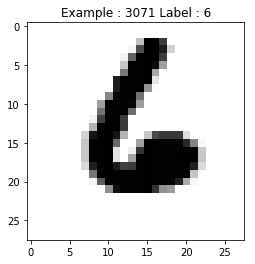

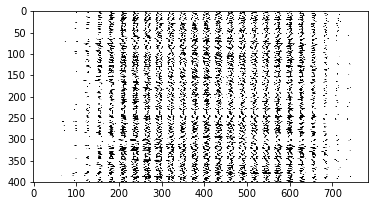

In [38]:
display_digit(random.randint(0, x_training.shape[0]))
flatten_digit(0, 400)

In [39]:
import tensorflow as tf
session = tf.Session()

In [40]:
x = tf.placeholder(tf.float32, shape = [None, 784])
#On assigning 'None' to the x placeholder, it means that the placeholder can be fed as many examples as desired,
#given that the size of each example is 784.

y0 = tf.placeholder(tf.float32, shape = [None, 10])
#y0 is the placeholder in which we will feed y_training into.

#Initialize random weights and biases
W = tf.Variable(tf.random_normal([784, 10], mean = 0, stddev = 0.05))
b = tf.Variable(tf.random_normal([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

In [41]:
#Define loss function we want to optimize
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y0 * tf.log(y), reduction_indices = [1]))

In [42]:
#This initializes all the tf.Variable variables so that they can be fed to the Tensorflow session
init = tf.global_variables_initializer()
session.run(init)

#Setting the rules for optimization
training = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [43]:
for i in range(epochs):
    session.run(training, feed_dict = {x : x_training, y0 : y_training})
    if i % 100 == 0 :
        print("Epoch = " + str(i) + " Loss = " + str(session.run(cross_entropy, feed_dict = {x : x_training, y0 : y_training})))
        

Epoch = 0 Loss = 2.75731
Epoch = 100 Loss = 1.66004
Epoch = 200 Loss = 1.27194
Epoch = 300 Loss = 1.06379
Epoch = 400 Loss = 0.934918
Epoch = 500 Loss = 0.846822
Epoch = 600 Loss = 0.782368
Epoch = 700 Loss = 0.732867
Epoch = 800 Loss = 0.693457
Epoch = 900 Loss = 0.661201
Epoch = 1000 Loss = 0.634217
Epoch = 1100 Loss = 0.61124
Epoch = 1200 Loss = 0.591385
Epoch = 1300 Loss = 0.574017
Epoch = 1400 Loss = 0.558663
Epoch = 1500 Loss = 0.544967
Epoch = 1600 Loss = 0.532654
Epoch = 1700 Loss = 0.521506
Epoch = 1800 Loss = 0.511351
Epoch = 1900 Loss = 0.502051
Epoch = 2000 Loss = 0.493492
Epoch = 2100 Loss = 0.485579
Epoch = 2200 Loss = 0.478235
Epoch = 2300 Loss = 0.471394
Epoch = 2400 Loss = 0.464999
Epoch = 2500 Loss = 0.459005
Epoch = 2600 Loss = 0.453369
Epoch = 2700 Loss = 0.448057
Epoch = 2800 Loss = 0.443039
Epoch = 2900 Loss = 0.438286


Total training images in the dataset = (55000, 784)
Training features loaded = (1, 784)
Training labels loaded = (1, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


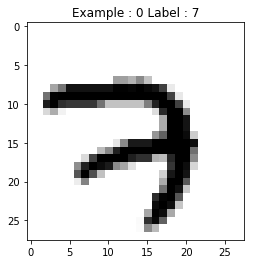

7


In [47]:
#Now that our classifier has been trained, let's check how it works on one example.
x1, y1 = training_batch_size(1)
display_digit(0)
answer = session.run(y, feed_dict = {x : x1})
print(answer.argmax())